In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt

timezone = 'Europe/Helsinki'
csv_folder = 'lampotilat/data/'

In [2]:
def load_data(name):
    df = pd.read_csv(csv_folder+name+'.csv', sep=',', warn_bad_lines=False, error_bad_lines=False, dtype=str)
    df.columns = ['epoch', 'data']
    df['date'] = pd.to_datetime(df['epoch'], unit='ms', utc=True)
    df[name] = pd.to_numeric(df['data'], errors='coerce')
    df = df.set_index('date').drop(columns=['epoch', 'data'])
    df = df.tz_convert(tz=timezone)
    df = df[df[name]<50]
    df = df[df[name]>-50]
    return df

In [3]:
def load_dataset():
    df = pd.concat([load_data('sisalla'), load_data('ulkona'), load_data('jarvessa'),  load_data('kellarissa'), load_data('rauhalassa')])
    df = df.sort_values('date')
    df = df.groupby(pd.Grouper(freq='H')).mean()
    return df

In [4]:
df = load_dataset()
df_daily = df.groupby(pd.Grouper(freq='D')).mean()
print(df)

                             sisalla     ulkona  jarvessa  kellarissa  \
date                                                                    
2014-06-29 13:00:00+03:00        NaN  11.000000       NaN         NaN   
2014-06-29 14:00:00+03:00        NaN  10.900000       NaN         NaN   
2014-06-29 15:00:00+03:00        NaN  11.150000       NaN         NaN   
2014-06-29 16:00:00+03:00        NaN  11.575000       NaN         NaN   
2014-06-29 17:00:00+03:00        NaN  11.800000       NaN         NaN   
...                              ...        ...       ...         ...   
2020-12-30 12:00:00+02:00  22.600000   1.166667       NaN        6.90   
2020-12-30 13:00:00+02:00  22.200000   1.666667       NaN        6.95   
2020-12-30 14:00:00+02:00  22.366667   2.033333       NaN        7.00   
2020-12-30 15:00:00+02:00  22.666667   2.283333       NaN        6.95   
2020-12-30 16:00:00+02:00  22.900000   2.540000       NaN        6.90   

                           rauhalassa  
date      

<Figure size 1152x360 with 0 Axes>

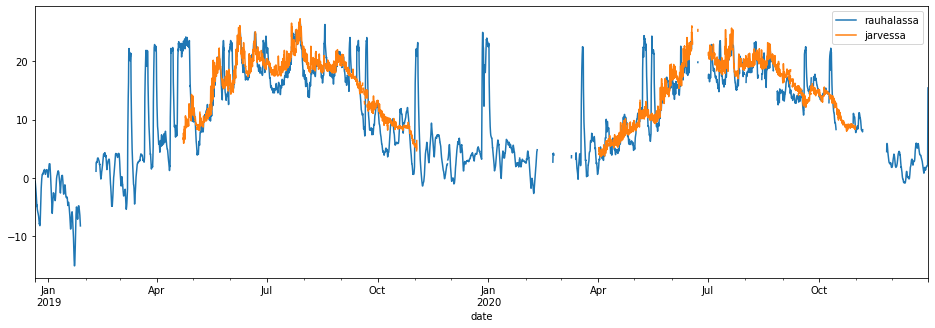

In [5]:
df2 = df[['rauhalassa','jarvessa']].loc['2018-12-21':'2020-12-31']

matplotlib.rcParams['figure.figsize'] = [16, 5]
plt.figure()
df2.plot()
plt.legend(loc='best')
#plt.savefig('chart.png')
plt.plot(df2);


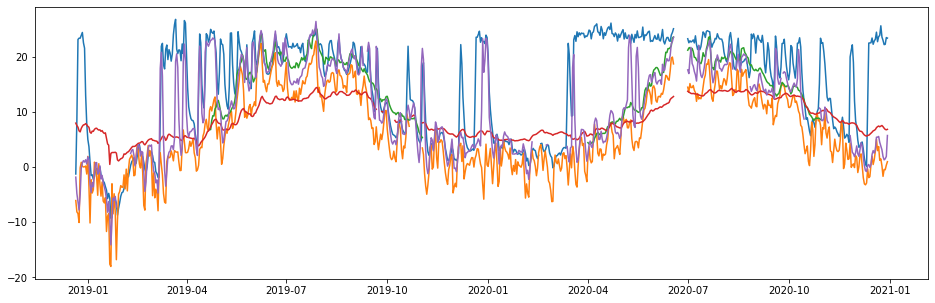

In [6]:
df2 = df_daily.loc['2018-12-21':'2020-12-31']
plt.plot(df2);

                             sisalla     ulkona   jarvessa  kellarissa  \
date                                                                     
2014-06-30 00:00:00+03:00        NaN  12.021780  16.279688         NaN   
2014-07-31 00:00:00+03:00  24.879348  18.541722  22.441584   14.045778   
2014-08-31 00:00:00+03:00  19.373799  16.166689  21.637970   14.006791   
2014-09-30 00:00:00+03:00  13.514981  11.257095  16.542014   11.231018   
2014-10-31 00:00:00+02:00  10.485244   5.779131   8.849108    8.657748   
...                              ...        ...        ...         ...   
2020-08-31 00:00:00+03:00  20.530063  14.980821  19.825838   13.744629   
2020-09-30 00:00:00+03:00  20.050556  12.021731  15.395714   13.138167   
2020-10-31 00:00:00+02:00  14.577807   7.505529  11.547326   11.397182   
2020-11-30 00:00:00+02:00  11.253380   3.763245        NaN    8.859444   
2020-12-31 00:00:00+02:00  15.737410   0.449998        NaN    6.702100   

                           rauhalassa

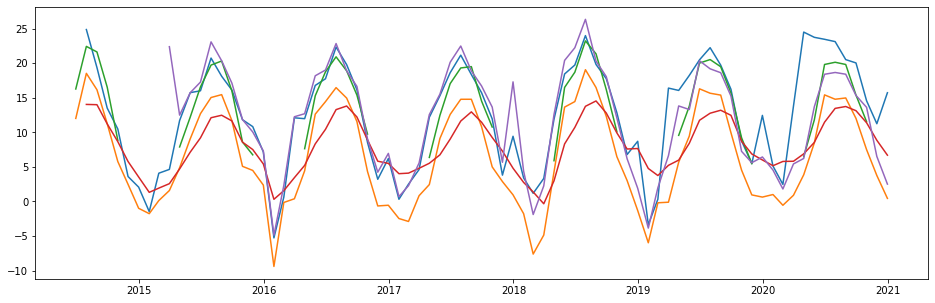

In [7]:
df_monthly = df_daily.groupby(pd.Grouper(freq='M')).mean()
print(df_monthly)
plt.plot(df_monthly);

In [8]:
df_yearly = df_monthly.groupby(pd.Grouper(freq='Y')).mean()
print(df_yearly)

                             sisalla    ulkona   jarvessa  kellarissa  \
date                                                                    
2014-12-31 00:00:00+02:00  12.323797  9.322969  17.150073    9.544941   
2015-12-31 00:00:00+02:00  11.298857  6.731995  13.512693    7.058410   
2016-12-31 00:00:00+02:00  10.859039  5.711381  15.241330    7.410725   
2017-12-31 00:00:00+02:00  11.172678  5.741504  14.289830    7.639811   
2018-12-31 00:00:00+02:00  12.332535  6.186813  16.000929    7.680158   
2019-12-31 00:00:00+02:00  12.760253  6.028236  14.225151    8.330836   
2020-12-31 00:00:00+02:00  16.535363  6.886282  15.005340    9.251932   

                           rauhalassa  
date                                   
2014-12-31 00:00:00+02:00         NaN  
2015-12-31 00:00:00+02:00   15.772658  
2016-12-31 00:00:00+02:00   11.524280  
2017-12-31 00:00:00+02:00   12.629760  
2018-12-31 00:00:00+02:00   12.076081  
2019-12-31 00:00:00+02:00   10.388604  
2020-12-31 00:00:00+02